## [Random-Variable_Probability-Distribution]
<br/>

- 이산형 확률변수
    - 1차원 이산형 확률변수
        - 확률질량함수
        - 누적분포함수
    - 2차원 이산형 확률변수
        - 결합확률분포
        - 결합확률함수
        - 주변확률분포
    <br/><br/>

- 연속형 확률변수
    - 1차원 연속형 확률변수
        - 확률밀도함수
        - 누적분포함수
    - 2차원 연속형 확률변수
        - 결합확률밀도함수
        - 주변확률밀도함수
    <br/><br/>
    
- 통계분석을 위한 대표적인 확률분포
    - 정규분포
    - 표준정규분포
    - 카이제곱분포
    - t분포
    - F분포
    <br/><br/>

### 1차원 이산형 확률변수
<br/>

In [4]:
# 1차원 이산형 확률변수
import numpy as np

# 확률질량함수
x_set = np.array([1, 2, 3, 4, 5, 6])

def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0
    
X = [x_set, f]

# 확률 p_k
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

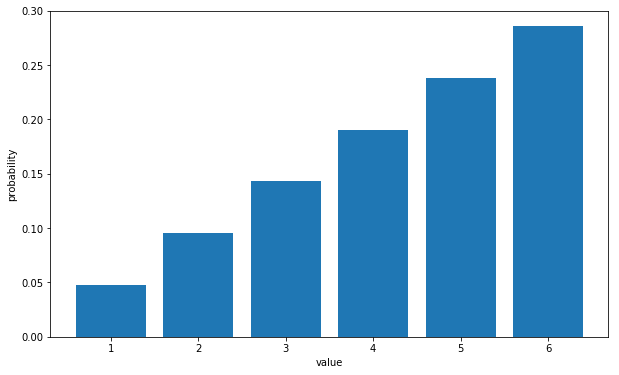

In [6]:
# 확률질량함수 plotting
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

In [7]:
# 누적분포함수 구현
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

F(3)

0.2857142857142857

### 2차원 이산형 확률변수
<br/>

In [8]:
# 2차원 이산형 확률변수 정의

# 결합확률분포
# x : A의 눈과 B의 눈을 더한 값
# y : A의 눈

x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

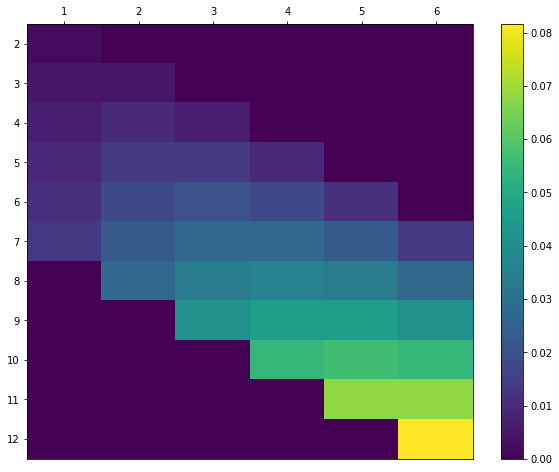

In [9]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축의 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [10]:
# 주변확률분포

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

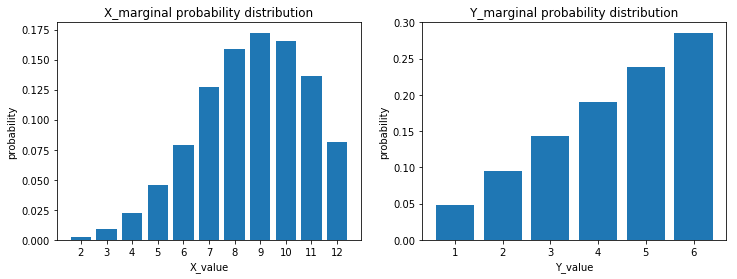

In [11]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

### 1차원 연속형 확률변수
<br/>

In [12]:
# 1차원 연속형 확률변수

import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

In [13]:
x_range = np.array([0, 1])

def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0
    
X = [x_range, f]

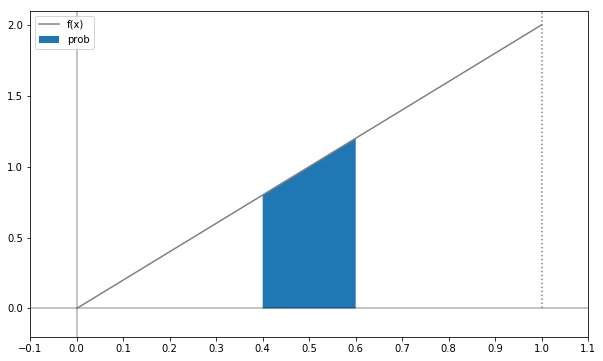

In [14]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4부터 0.6 까지 x좌표를 준비
xs = np.linspace(0.4, 0.6, 100)
# xs의 범위로 f(x)와 x축으로 둘러싸인 영역을 진하게 칠함
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [15]:
# 첫 번째 인수는 피적분함수、두 번째 인수와 세 번째 인수는 적분 범위
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

In [16]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
# 함수의 최솟값은 fun이라는 인스턴스 변수에
res.fun

0

In [17]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

In [18]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [19]:
F(0.6) - F(0.4)

0.200

In [26]:
# 1차원 연속형 확률변수의 누적분포함수

y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) / 2
    else:
        return 0
    
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

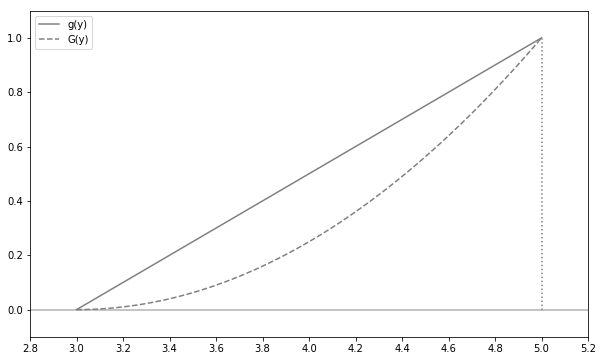

In [27]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys],
        label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys],
        label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

### 2차원 연속형 확률변수
<br/>

In [28]:
# 2차원 연속형 확률변수
# x : 불공정한 룰렛들인 A의 값과 B의 값을 더한 값
# y : 불공정한 룰렛 A의 값

x_range = [0, 2]
y_range = [0, 1]

In [29]:
def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x - y)
    else:
        return 0

In [30]:
XY = [x_range, y_range, f_xy]

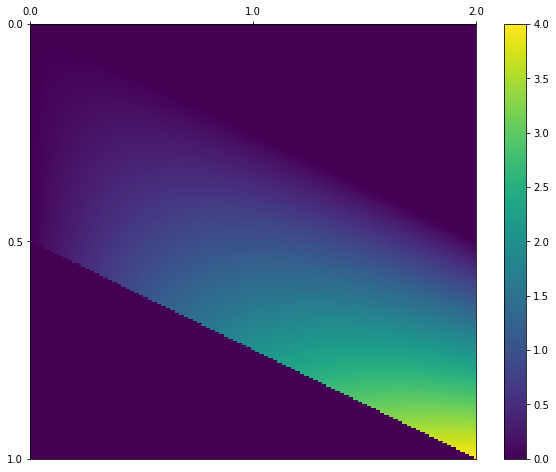

In [31]:
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x, y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
ax.set_yticks(np.linspace(0, 200, 3), minor=False)
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [32]:
# 첫 번째 인수는 피적분함수、두 번째 인수는 x의 적분구간과 y의 적분구간
integrate.nquad(f_xy,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

1.000

In [33]:
from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

In [34]:
X = [x_range, f_X]
Y = [y_range, f_Y]

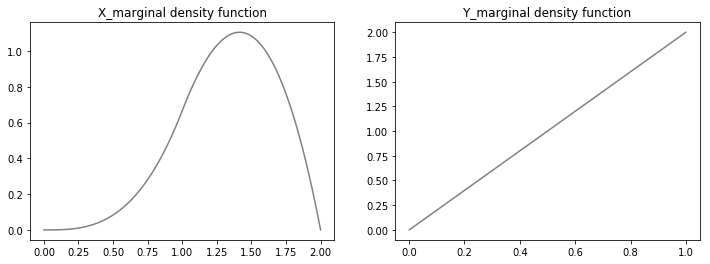

In [35]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()

### 대표적인 확률분포
<br/>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [42]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

- ### 정규분포

In [43]:
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

In [44]:
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [45]:
check_prob(X)

expected vaue 2.000
variance 0.250


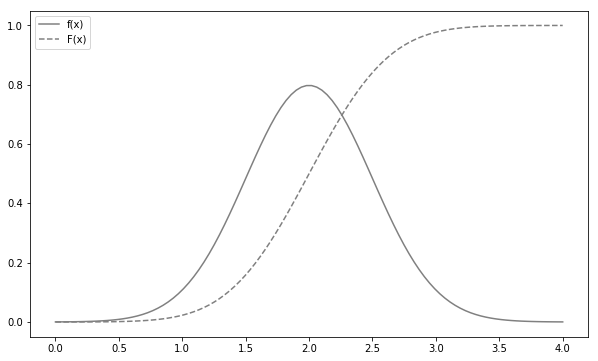

In [46]:
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

plot_prob(X, 0, 4)

In [47]:
rv = stats.norm(2, 0.5)

In [48]:
rv.mean(), rv.var()

(2.0, 0.25)

In [49]:
rv.pdf(2)

0.7978845608028654

In [50]:
rv.cdf(1.7)

0.27425311775007355

In [51]:
rv.isf(0.3)

2.2622002563540207

In [52]:
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

In [53]:
rv.isf(0.95), rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

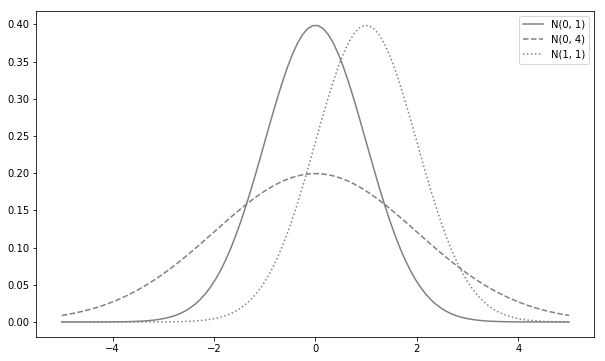

In [54]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()

- ### 카이제곱분포

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

n = 10
rv = stats.norm()
sample_size = int(1e6)
# 표준정규분포로부터 10×100만 사이즈로 무작위추출
Zs_sample = rv.rvs((n, sample_size))
# axis=0에서 총합을 구하고, 표준정규분포의 제곱합 표본 데이터를 구한다
chi2_sample = np.sum(Zs_sample**2, axis=0)

print(np.shape(Zs_sample))
print(np.shape(chi2_sample))

(10, 1000000)
(1000000,)


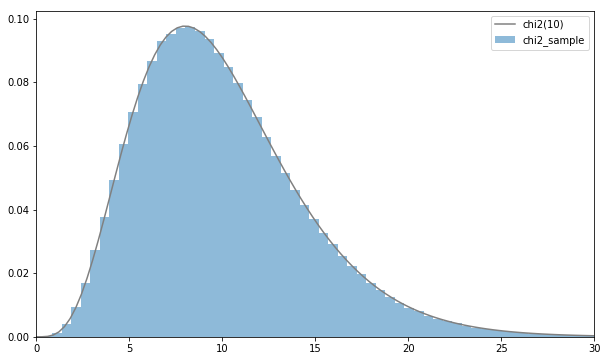

In [56]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
        alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0, 30)
plt.show()

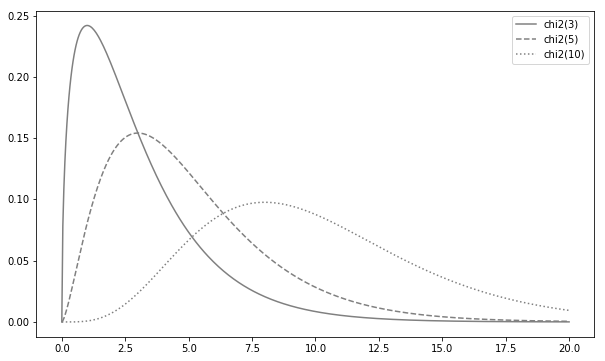

In [57]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

In [58]:
rv = stats.chi2(5)
rv.isf(0.05)

11.070497693516355

(10, 1000000)
(1000000,)


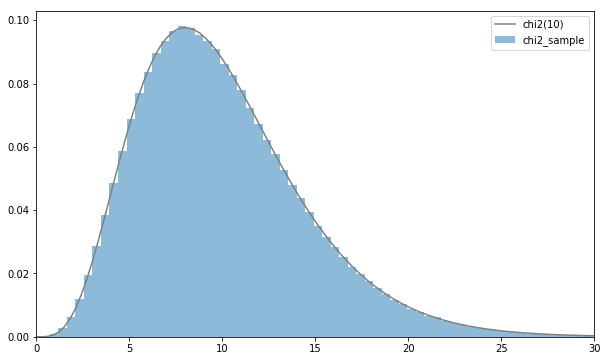

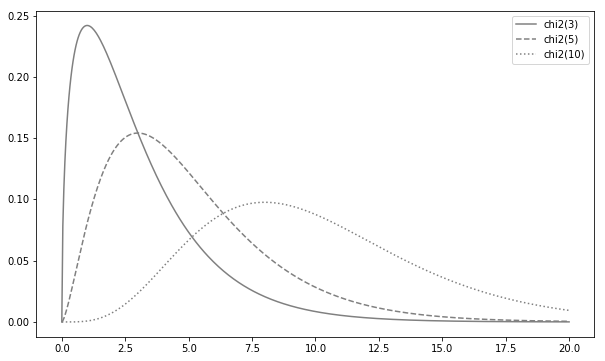

11.070497693516355

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

n = 10
rv = stats.norm()
sample_size = int(1e6)
# 표준정규분포로부터 10×100만 사이즈로 무작위추출
Zs_sample = rv.rvs((n, sample_size))
# axis=0에서 총합을 구하고, 표준정규분포의 제곱합 표본 데이터를 구한다
chi2_sample = np.sum(Zs_sample**2, axis=0)

print(np.shape(Zs_sample))
print(np.shape(chi2_sample))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
        alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0, 30)
plt.show()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

rv = stats.chi2(5)
rv.isf(0.05)

- ### t분포

In [60]:
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

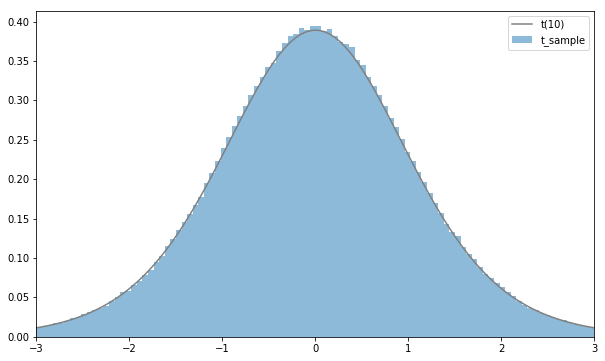

In [61]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3, 3),
        density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

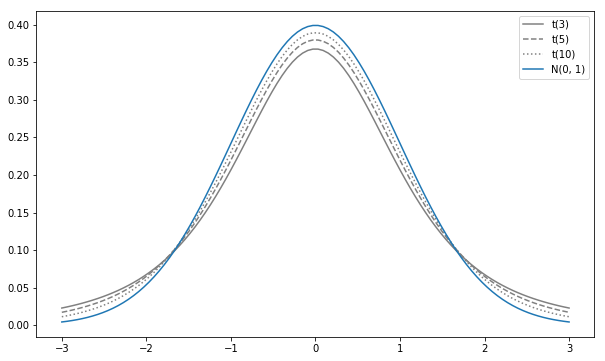

In [62]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label=f't({n})', ls=ls, color='gray')
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')
    
ax.legend()
plt.show()

In [63]:
rv = stats.t(5)
rv.isf(0.05)

2.0150483726691575

- ### F분포

In [64]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

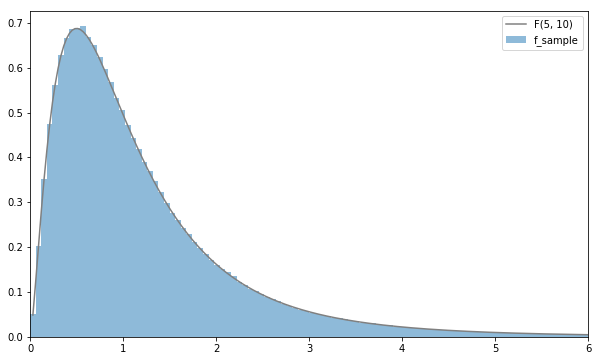

In [65]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2)
xs = np.linspace(0, 6, 200)[1:]
ax.hist(f_sample, bins=100, range=(0, 6),
        density=True, alpha=0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='gray')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

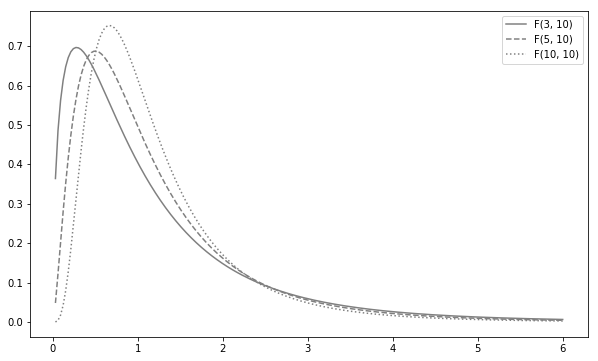

In [66]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3, 5, 10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs),
            label=f'F({n1}, 10)', ls=ls, color='gray')
    
ax.legend()
plt.show()